In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio



In [38]:
from datetime import datetime, timedelta

start_date = datetime(2019, 8, 27)
end_date = datetime(2020, 9, 15)
date_range = [start_date + timedelta(days=x) for x in range((end_date-start_date).days + 1)]
days = [(d - datetime(1, 1, 1)).days for d in date_range]

In [42]:
# read in csv file into numpy array 
spc_N = np.loadtxt('spc_N_1.csv', delimiter=',')
spc_t = np.loadtxt('spc_time_1.csv', delimiter=',')
clasp_t = np.loadtxt('clasp_time_1.csv', delimiter=',')
#clasp_N = np.loadtxt('clasp_N_1.csv', delimiter=',')
clasp_meanR = np.loadtxt('clasp_meanR_2.csv', delimiter=',')
clasp_conc = np.loadtxt('clasp_conc_2.csv', delimiter=',')
clasp_calib = np.loadtxt('clasp_calibr_2.csv', delimiter=',')


# read in spc_velocity surface



In [43]:
spc_u8cm = np.loadtxt('spc_U8cm_1.csv', delimiter = ',')

In [44]:
t1 = start_date
t2 = end_date 

# convert clasp_t and spc_t to datetime
clasp_t_new = np.array([datetime.fromordinal(int(d)) + timedelta(days=d%1) - timedelta(days = 366) for d in clasp_t[:,0]])
spc_t_new = np.array([datetime.fromordinal(int(d)) + timedelta(days=d%1) - timedelta(days = 366) for d in spc_t])

# new start and end dates for conditional time
t1 = np.min(spc_t_new)
t2 = np.max(spc_t_new)

# conditional time between t1 and t2
n0 = ((clasp_t_new[:]>t1) & (clasp_t_new[:]<t2))
n2 = ((spc_t_new>t1)& (spc_t_new<t2))
#np.nansum(spc_N[n2,:],axis = 1)
print(clasp_t_new.shape, spc_t_new.shape)
print(f'clasp_min_time = {clasp_t_new[0]} ---- clasp_max_time = {clasp_t_new[-1]}')
print(f'spc_min_time = {spc_t_new[0]} ---- spc_max_time = {spc_t_new[-1]}')

(316348,) (277920,)
clasp_min_time = 2019-10-26 04:37:32.299850 ---- clasp_max_time = 2020-09-13 11:58:31.962890
spc_min_time = 2019-12-02 00:00:59.999966 ---- spc_max_time = 2020-07-30 00:00:00


Text(0.5, 0, 'Time')

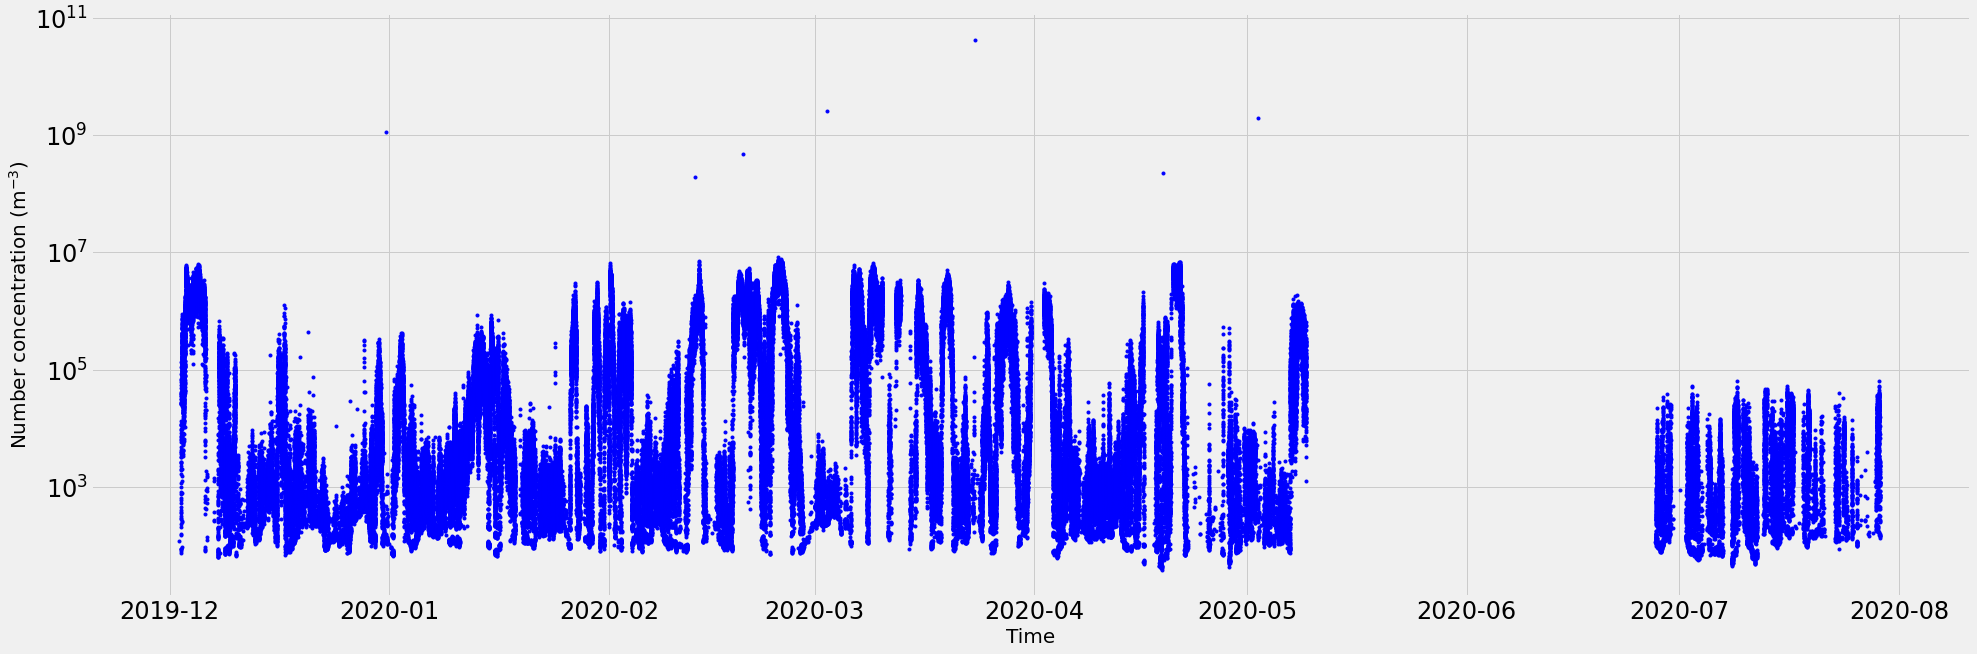

In [45]:
# plot the SPC concentration time series
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
plt.plot(spc_t_new[n2], (np.nansum(spc_N[n2,:],axis = 1)), 'b.', label = 'SPC time series')

plt.yscale('log')
#plt.ylim([1e2,1e6])
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 24)
plt.ylabel('Number concentration (m$^{-3}$)', fontsize = 20)
plt.xlabel('Time', fontsize = 20)


Text(0.5, 1.0, 'SPC measurements -- N (snow particles / m$^{3}$) ')

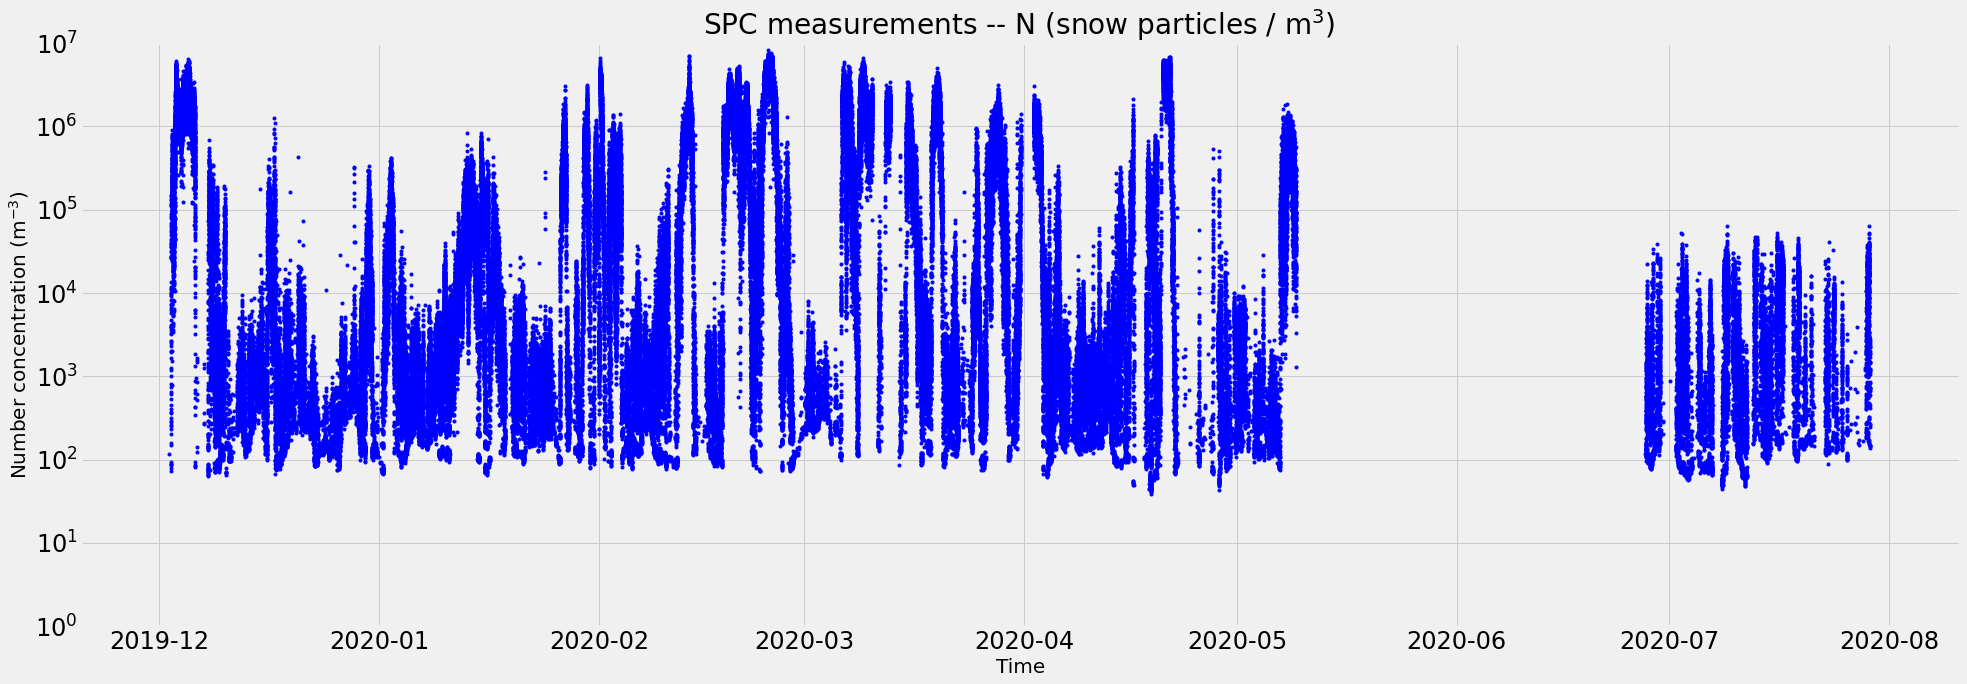

In [46]:
# make the same plot with a rolling mean of 1 week 
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')

# calculate the weekly rolling mean and time rolling mean and plot
plt.plot(spc_t_new[n2], (np.nansum(spc_N[n2,:],axis = 1)), 'b.', label = 'SPC time series')    

# plot new time and rolling mean
#plt.plot(spc_t_new[n2], pd.Series(np.nansum(spc_N[n2,:],axis = 1)).rolling(window=7).mean(), 'b.', label = 'SPC time series')

window_size = 7

# Calculate the moving average
spc_N_ma = np.convolve(np.nansum(spc_N[n2,:],axis=1), np.ones((window_size,))/window_size, mode='valid')

# Plot the moving average
#plt.plot(spc_t_new[n2][window_size//2:-window_size//2], spc_N_ma[:(len(spc_N_ma)-1)], 'r-', linewidth = 0.4,label='Moving Average')

plt.yscale('log')
plt.ylim([1,1e7])
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 24)
plt.ylabel('Number concentration (m$^{-3}$)', fontsize = 20)
plt.xlabel('Time', fontsize = 20)
plt.title('SPC measurements -- N (snow particles / m$^{3}$) ', fontsize = 28)



(0.0, 150.0)

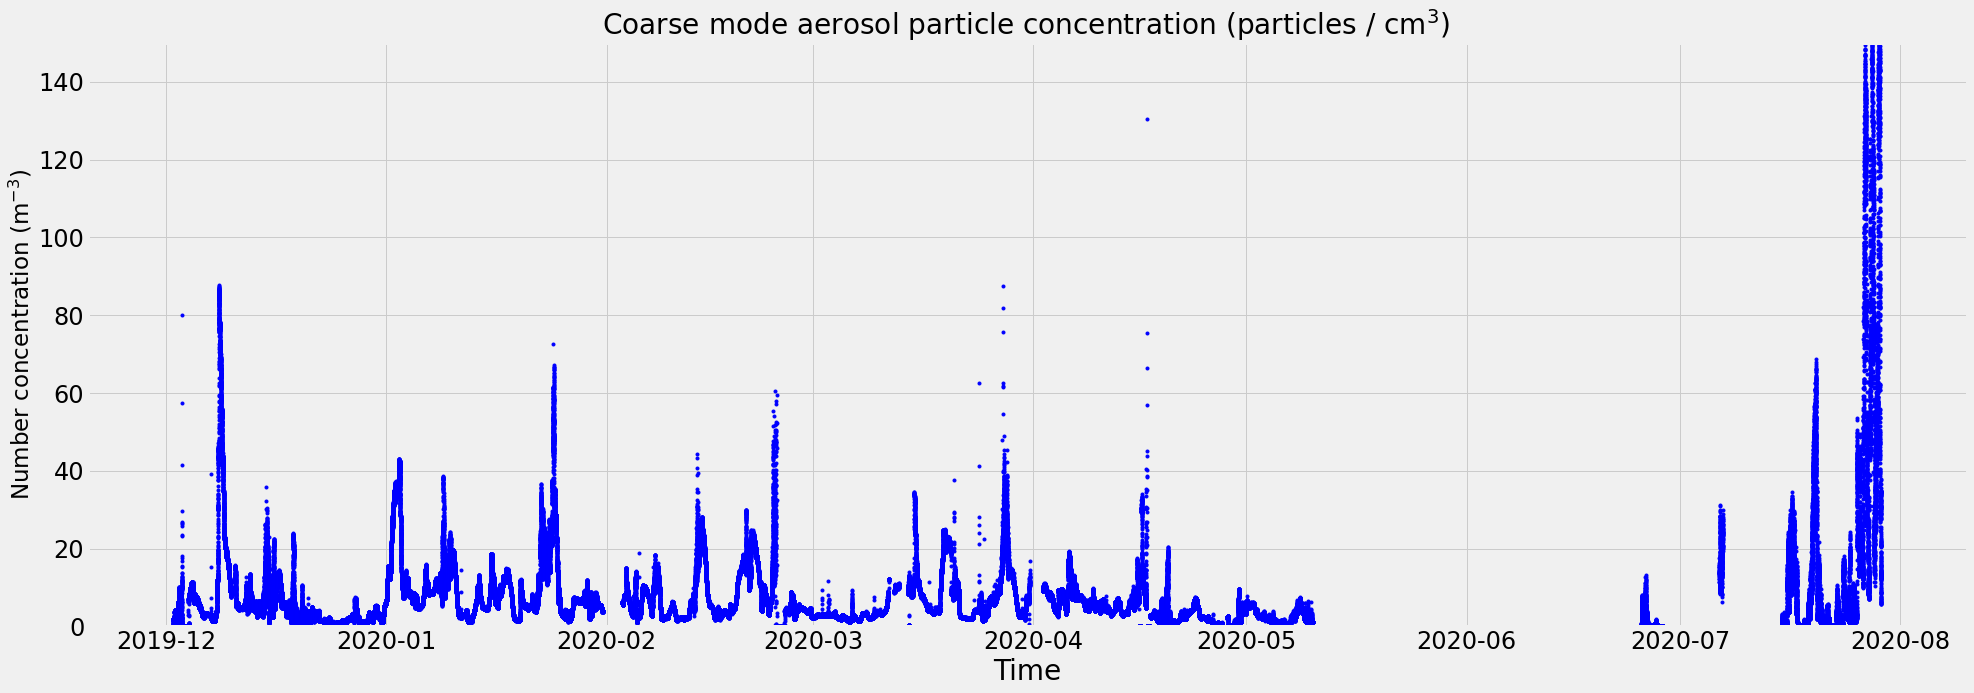

In [55]:
# plot the CLASP data
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
plt.plot(clasp_t_new[n0], np.nansum(clasp_conc[n0,:], axis = 1), 'b.', label = 'CLASP time series')
#plt.yscale('log')
plt.title('Coarse mode aerosol particle concentration (particles / cm$^{3}$) ', fontsize = 28)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.ylabel('Number concentration (m$^{-3}$)', fontsize = 23)
plt.xlabel('Time', fontsize = 28)
plt.ylim([0, 150])

# plot of both clasp and spc_velocity

Text(0.5, 0, 'Time')

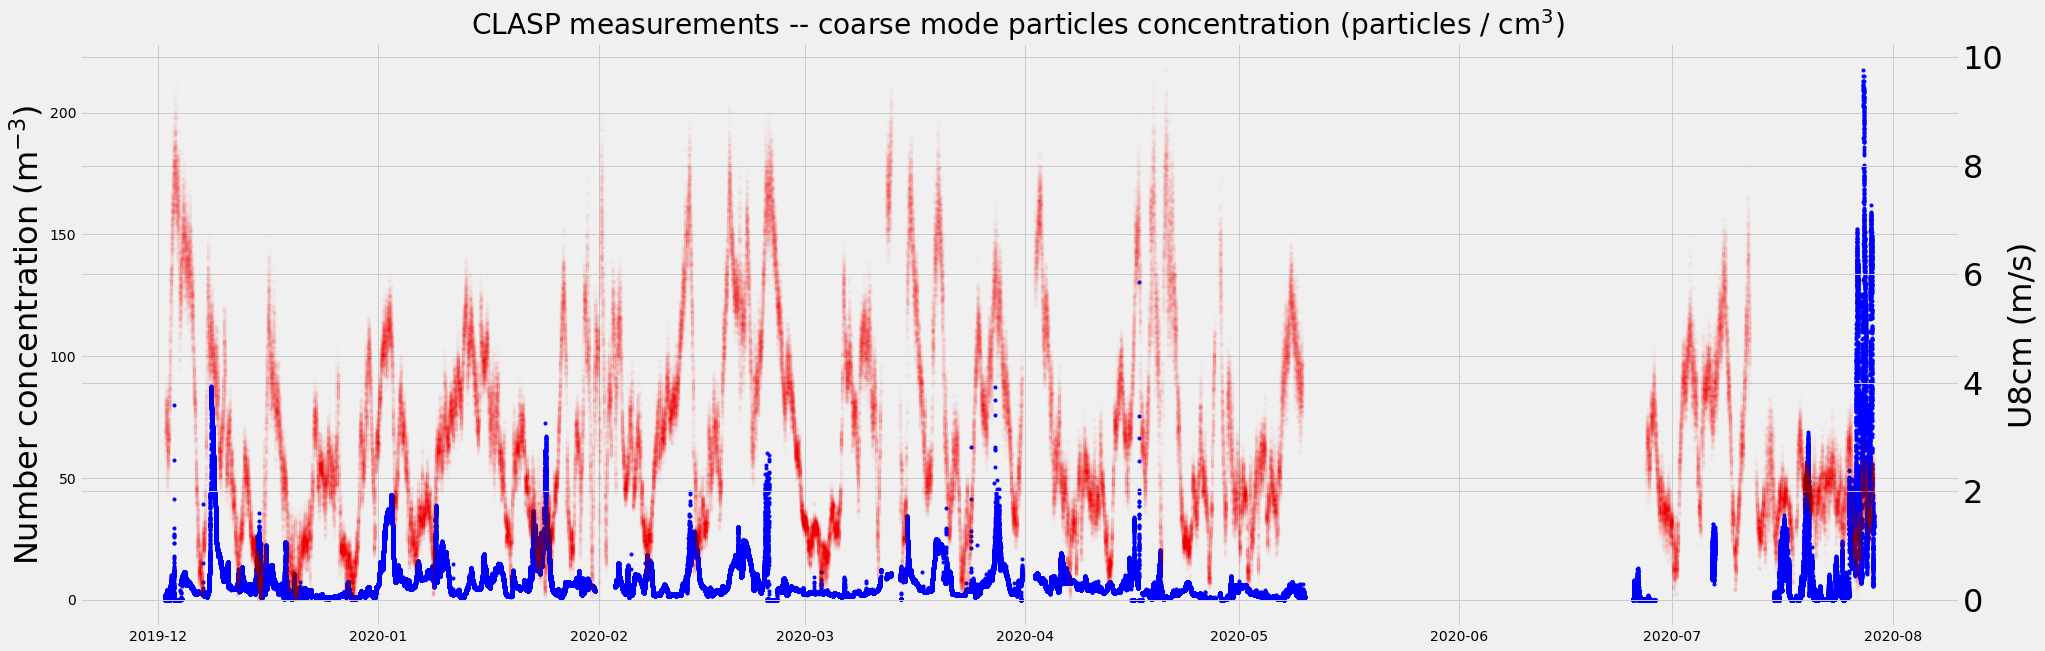

In [48]:
# plot the CLASP data
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')

# plot first y axis data 
plt.plot(clasp_t_new[n0], np.nansum(clasp_conc[n0,:], axis = 1), 'b.', label = 'CLASP time series')
#plt.yscale('log')
# ylabel for first y axis
plt.ylabel('Number concentration (m$^{-3}$)', fontsize = 32)

# plot second y axis data
plt.twinx()
plt.plot(spc_t_new[n2], spc_u8cm[n2], 'r.', label = 'U8cm', alpha = 0.01)
plt.ylabel('U8cm (m/s)', fontsize = 32)

#plt.yscale('log')
plt.title('CLASP measurements -- coarse mode particles concentration (particles / cm$^{3}$) ', fontsize = 28)
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
#plt.ylabel('Number concentration (m$^{-3}$)', fontsize = 23)
plt.xlabel('Time', fontsize = 40)
#plt.yscale('log')
#plt.ylim([9500,1e4])

Text(0.5, 0, 'Time')

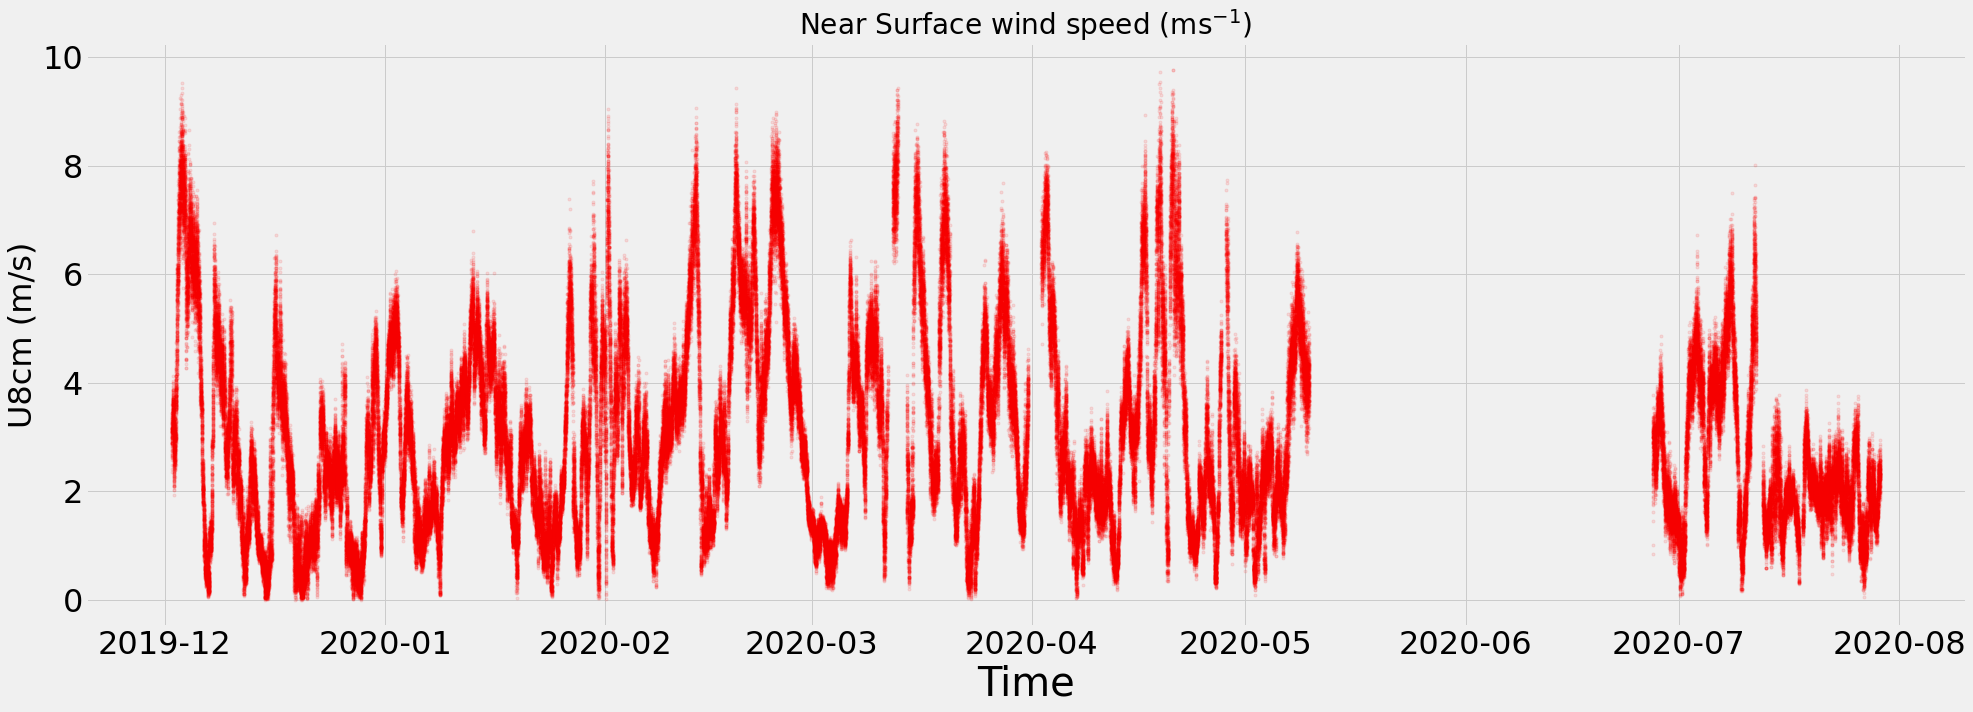

In [56]:
# plot the CLASP data
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')

# plot first y axis data 


# plot second y axis data
plt.plot(spc_t_new[n2], spc_u8cm[n2], 'r.', label = 'U8cm', alpha = 0.1)
plt.ylabel('U8cm (m/s)', fontsize = 32)

#plt.yscale('log')
plt.title('Near Surface wind speed (ms$^{-1}$)', fontsize = 28)
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
#plt.ylabel('Number concentration (m$^{-3}$)', fontsize = 23)
plt.xlabel('Time', fontsize = 40)
#plt.yscale('log')
#plt.ylim([9500,1e4])

/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


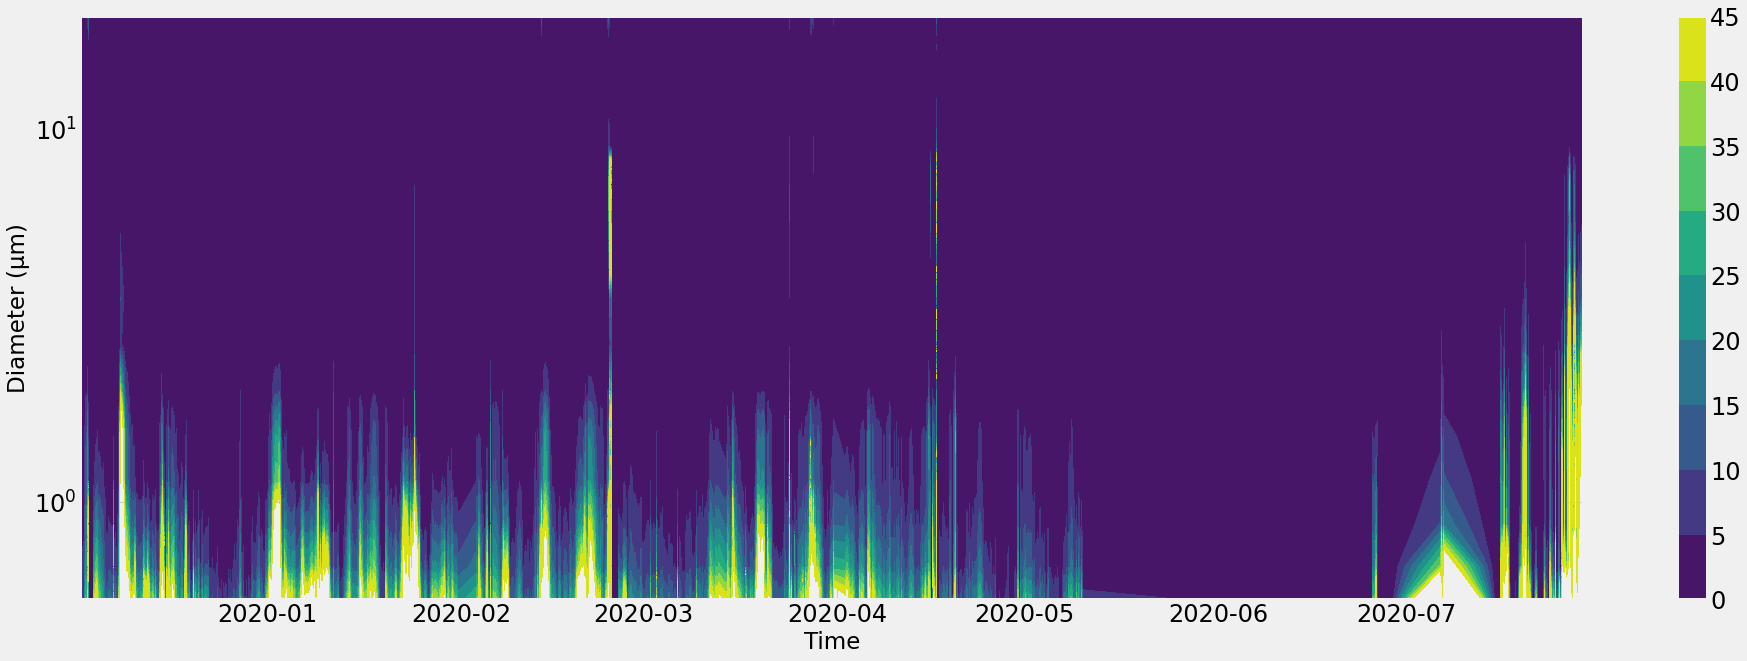

In [60]:
# plot the CLASP data
dlogD = np.diff(np.log10(clasp_calib*2))
dlogD = dlogD.reshape((1,16))
dNdlogD = clasp_conc[n0,0:16]/np.tile(dlogD, (243273, 1))
plt.figure(figsize=(30,10))
v = np.linspace(0, 50, 100)
v = np.arange(0,50,5)
plt.contourf(clasp_t_new[n0], clasp_meanR[0, :]*2, dNdlogD.T, levels=v)
##plt.colorbar(label)
plt.yscale('log')
#plt.ylim([1e-3,1e-1])
#plt.title('CLASP measurements', fontsize = 28)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.ylabel('Diameter (μm)', fontsize = 23)
plt.xlabel('Time', fontsize = 23)
# increase font size of colorbar
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=24)



In [20]:
clasp_meanR.shape

(16,)

In [ ]:
# convert clasp_t to datetime
clasp_t_new = [datetime(1, 1, 1) + timedelta(days=int(d)) for d in clasp_t[:,0]]
spc_t_new = [datetime(1,1,1) + timedelta(days = int(d)) for d in spc_t]


In [ ]:
clasp_t_new = np.array([datetime.fromordinal(int(d)) + timedelta(days=d%1) - timedelta(days = 366) for d in clasp_t])


In [ ]:
clasp_t_new[]